In [1]:
import torch
import numpy as np
from torch import nn, optim
from torch.autograd import Variable
from matplotlib import pyplot as plt 

In [2]:
def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1,4)], 1)

print(torch.FloatTensor([0.5, 3, 2.4]))
W_target = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])
print(W_target)

def f(x):
    return x.mm(W_target) + b_target[0]

tensor([0.5000, 3.0000, 2.4000])
tensor([[0.5000],
        [3.0000],
        [2.4000]])


In [3]:
# 随机生成训练集
def get_batch(batch_size = 32):
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    # print(x.size(), y.size())
    return Variable(x).cuda(), Variable(y).cuda()
# get_batch(32)

In [4]:
class poly_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.poly = nn.Linear(3, 1)
        
    def forward(self, x):
        out = self.poly(x)
        return out

model = poly_model().cuda()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)

In [30]:
epoch = 0
while True:
    # 获取数据
    batch_x, batch_y = get_batch()
    # 前向传播
    output = model(batch_x)
    loss = criterion(output, batch_y)
    print_loss = loss.item()
    # 不要忘记归零梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
    epoch += 1
    if print_loss < 1e-3:
        break

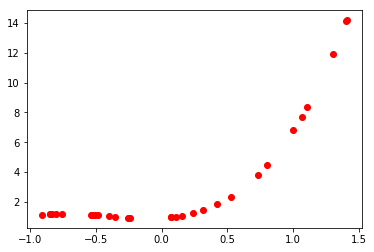

In [54]:
model.eval()
x = np.arange(-1, 1.5, 0.1)
plt.plot(batch_x.t()[0].cpu().numpy(), batch_y.cpu().numpy(), 'ro', label='Original data')
# 显示图例
plt.show()